# Complex Networks: Exercise Sheet #1

### Luis Martin

In [113]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import optimize
import sys
import random

%matplotlib inline

In [5]:
import psutil
psutil.virtual_memory()

svmem(total=8589934592L, available=2497290240L, percent=70.9, used=5231411200L, free=2178166784L, active=3213291520L, inactive=319123456L, wired=1698996224L)

## 1. Generating Barabási-Albert Networks

For this exercise you have to generate networks following the $Barabasi-Albert$ model. The model works as follows:
1. Start with a fully connected graph of $m$ nodes.
2. Add a node to the graph and attach it to $m$ pre-existing nodes with a probability proportional to their degrees.
3. Repeat 2 until reaching the desired size of the network $N$.
    

#### Implement the model with your preferred programming language without making use of network generators already implemented. 

In [3]:
def BA(n,m): ## Based on python code
    
    G=nx.complete_graph(m); ## Start with a complete graph
    
    targets=list(range(m)); # Target nodes for new edges
    repeated_nodes=list(range(m))*(m-1); # List of existing nodes, with nodes repeated once for each adjacent edge
    jj=m; # Start adding the other n-m nodes. The first node is m.
    
    while jj<n:
        
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([jj]*m,targets));
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets);
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([jj]*m);
        
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachement)
        # Don't want repeated nodes
        
        ii=0;  
        while ii==0:
            targets =random.sample(repeated_nodes,m);
            if len(set(targets)) == m:
                ii=1;        

        jj += 1;
                
    return G

#### Plot the degree distribution. Does it agree with the calculations seen in class?

In [7]:
G=BA(1E6,2); ## Barabási graph
print nx.info(G)

Name: complete_graph(2)
Type: Graph
Number of nodes: 1000000
Number of edges: 1999997
Average degree:   4.0000


Slope = -2.755184


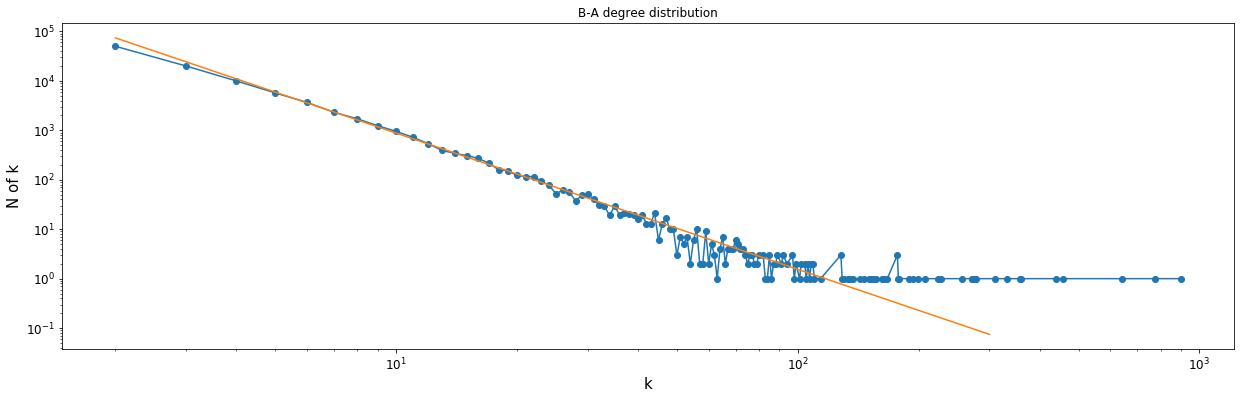

In [14]:
hist = np.array(nx.degree_histogram(G)); ##Degree histogram

k = np.where(hist>0)[0]; ##Degree 
N_of_k = hist[k]; ## Number of nodes with degree k

##Degree distribution in log scale
plt.figure(figsize=(21, 6));
plt.figure(1);
plt.plot(k, N_of_k, "o-");
plt.xscale('log');
plt.yscale('log');
plt.xlabel("k", fontsize=15);  
plt.ylabel("N of k", fontsize=15);
plt.xticks(fontsize=12); 
plt.yticks(fontsize=12);
plt.title('B-A degree distribution');


def fitting_function(x, A, B):
    return A*x**B

initial = [2, 2]; P_fit = [];
popt, pcov = optimize.curve_fit(fitting_function, k[10:80], N_of_k[10:80], initial);
for n in k[10:80]:
    P_fit.append(fitting_function(n,popt[0],popt[1]));
    
print "Slope = %f" % popt[1]

plt.figure(1);
x=np.linspace(2,300,1000);
y=popt[0]*x**popt[1];
plt.figure(1);
plt.plot(x,y);

As it is usual in this kind of models, with preferential attachment, there are much more nodes with low degrees but also a few nodes with a degree of orders of magnitude bigger. In class we have seen that the slope in logarithmic scale of the degree distribution plot is -3. If we pick some representative values in the mid degree range, we get an aproximation of the theoretical slope, which is -2.75. 

#### Plot the evolution of the degree of some nodes. Does it agree with the prediction from calculations?

In [15]:
def BA1(n,m): ## Based on python code
    
    G=nx.complete_graph(m); ## Start with a complete graph
    
    targets=list(range(m)); # Target nodes for new edges
    repeated_nodes=list(range(m))*(m-1); # List of existing nodes, with nodes repeated once for each adjacent edge
    jj=m; # Start adding the other n-m nodes. The first node is m.
    
    while jj<100:
        
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([jj]*m,targets));
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets);
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([jj]*m);
        
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachement)
        # Don't want repeated nodes
        
        ii=0;  
        while ii==0:
            targets =random.sample(repeated_nodes,m);
            if len(set(targets)) == m:
                ii=1;        

        jj += 1;
    
    random_nodes=[];    
    while len(set(random_nodes)) != 5:
        random_nodes=np.int_(np.random.rand(5)*100);
    degree_evolution=np.zeros((5,int(n-100)));
    
    while jj<n:
        
        # Add edges to m nodes from the source.
        G.add_edges_from(zip([jj]*m,targets));
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets);
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend([jj]*m);
        
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachement)
        # Don't want repeated nodes
        
        ii=0;  
        while ii==0:
            targets =random.sample(repeated_nodes,m);
            if len(set(targets)) == m:
                ii=1;        

        jj += 1;
        
        degree_evolution[:,jj-101]=list(G.degree(random_nodes).values());
        
    return G,degree_evolution,random_nodes

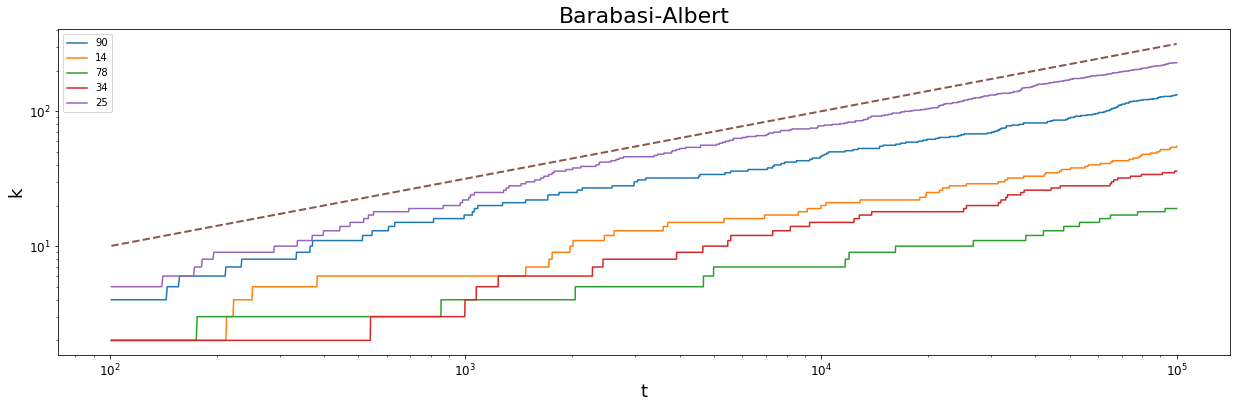

In [16]:
(G,D,random_nodes)=BA1(1E5,2);
t=np.linspace(101,int(1E5),int(1E5)-100);

##Figure 1 parameters
plt.figure(figsize=(21, 6));
plt.figure(1);
plt.xlabel("t", fontsize=18);
plt.ylabel("k", fontsize=18);
plt.title('Barabasi-Albert',fontsize=22);
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12)

for ii in xrange(5):
    plt.figure(1);
    plt.plot(t,D[ii,:],label = str(random_nodes[ii]))

plt.figure(1);
plt.plot(t,t**.5,'--',linewidth=2);
plt.xscale('log');
plt.yscale('log');
plt.legend();

Picking some random nodes we can see that their degrees evolve in log scale as a line with slope 0.5. That agrees with what we have seen in class were $k_i(t) \propto t^{0.5}$.

#### What is the largest network ($Nmax$) you can generate and how much timen does it take to generate it? Be careful with the use of RAM memory. Think how you can save memory in order to get to bigger networks.

In [7]:
G=BA(2,1)
print sys.getsizeof(G), 'bytes per graph'
print sys.getsizeof(G.edges()), 'bytes for edges'
print G.size(), 'number of edges'
print sys.getsizeof(G.nodes()), 'bytes per nodes'
print G.order(), 'number of nodes'
print ''

G=BA(3,1)
print sys.getsizeof(G), 'bytes per graph'
print sys.getsizeof(G.edges()), 'bytes for edges'
print G.size(), 'number of edges'
print sys.getsizeof(G.nodes()), 'bytes per nodes'
print G.order(), 'number of nodes'
print ''

G=BA(4,1)
print sys.getsizeof(G), 'bytes per graph'
print sys.getsizeof(G.edges()), 'bytes for edges'
print G.size(), 'number of edges'
print sys.getsizeof(G.nodes()), 'bytes per nodes'
print G.order(), 'number of nodes'
print ''

### +8 bytes each edge and each node ###

G=BA(1E5,1)
print sys.getsizeof(G), 'bytes per graph'
print sys.getsizeof(G.edges()), 'bytes for edges'
print G.size(), 'number of edges'
print sys.getsizeof(G.nodes()), 'bytes per nodes'
print G.order(), 'number of nodes'
print ''

### As long as the size increases the aproximation gets worse

G=BA(1E6,1)
print sys.getsizeof(G), 'bytes per graph'
print sys.getsizeof(G.edges()), 'bytes for edges'
print G.size(), 'number of edges'
print sys.getsizeof(G.nodes()), 'bytes per nodes'
print G.order(), 'number of nodes'
print ''

64 bytes per graph
104 bytes for edges
1 number of edges
112 bytes per nodes
2 number of nodes

64 bytes per graph
112 bytes for edges
2 number of edges
120 bytes per nodes
3 number of nodes

64 bytes per graph
120 bytes for edges
3 number of edges
128 bytes per nodes
4 number of nodes

64 bytes per graph
879848 bytes for edges
99999 number of edges
900120 bytes per nodes
100000 number of nodes

64 bytes per graph
8250176 bytes for edges
999999 number of edges
9000120 bytes per nodes
1000000 number of nodes



In [8]:
import psutil
psutil.virtual_memory()

svmem(total=8589934592L, available=927219712L, percent=89.2, used=6868066304L, free=519438336L, active=4758224896L, inactive=407781376L, wired=1702060032L)

RAM $= 8 Gb = 8·10^9 bytes$. In a Barabási-Albert model we have the same order of nodes and edges. Each node and each edge needs $8 bytes$. We have $10^9 bytes$ to store this information, $5·10^8$ for the nodes and the same for the edges. So our $Nmax$ in theory would be $10^8$. But even with the python implemented code, the maximum network we can generate is $10^6$. We are storing much more than nodes and edges, and possibly we are not using all the RAM. Using "psutil.virtual_memory" we can see that at the beginning of the program we have already the 70% of the memory occuped, and after the generation of a $10^6$ graph it increases since 90%.

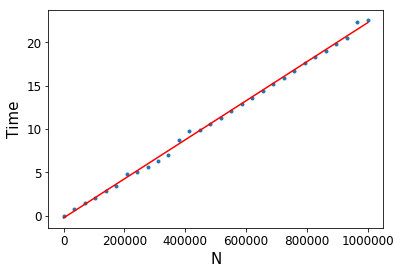

In [11]:
N = np.linspace(1E2,1E6,30);
tvec = [];
tmean_fit = [];

def fitting_function(x, A, B):
    return A*x+B

for n in N:
    t = %timeit -q -o BA(n,2); 
    tvec.append(t.worst);
    
initial = [0.5, 0.5];
popt, pcov = optimize.curve_fit(fitting_function, N, tvec, initial);
for n in N:
    tmean_fit.append(fitting_function(n,popt[0],popt[1]));
    
plt.plot(N, tvec,'.', N, tmean_fit, 'r');
plt.xlabel("N", fontsize=15);  
plt.ylabel("Time", fontsize=15);
plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

The generation time increases linearly. For $N=10^6$ it lasts 25s. For $N=10^7$ it will be $250s$ and for $N=10^8$, $40min$.